In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation
from matplotlib.animation import FuncAnimation, PillowWriter
import os
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D


from kalman_utils_3D import *
from model_evaluation_3D import plot_residuals

from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
from scipy.linalg import block_diag
from filterpy.stats import plot_covariance_ellipse
from filterpy.common import Saver

In [2]:
traj = Trajectoy3DGenerattion(sigma=0.3)

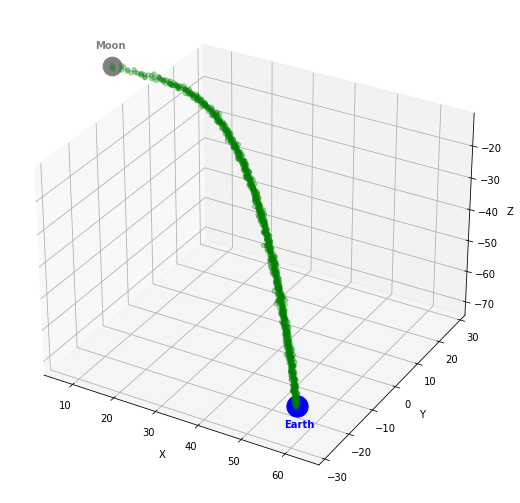

In [3]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Noisy Measurements")

plot_measurements_3D(traj, ax)

In [4]:
tracker = Ship_tracker(traj)
preds, cov = run(tracker, traj)

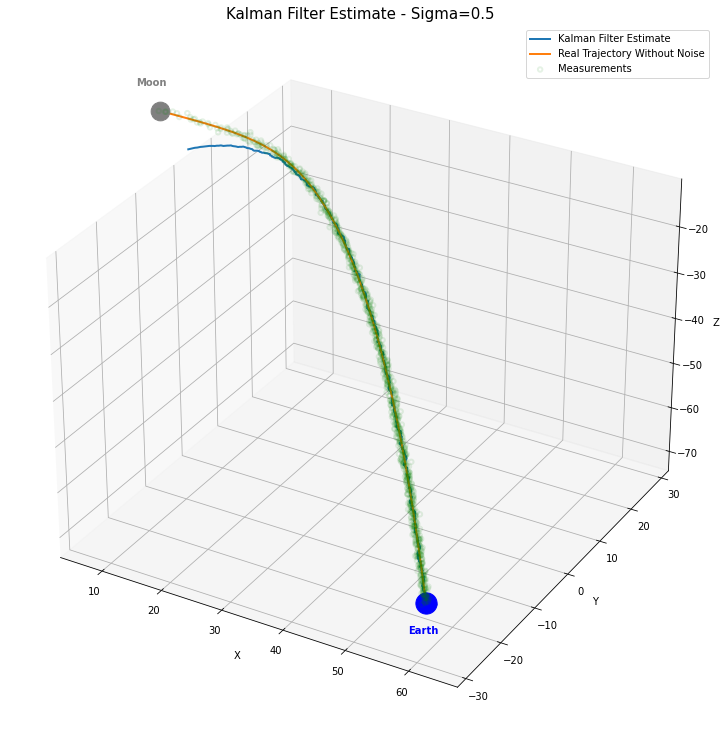

In [5]:
fig = plt.figure(figsize=(16,13))
ax = fig.add_subplot(111, projection='3d')
plot_prediction(preds, traj, ax)
fig.savefig(os.path.join("Plots","Kalman_Prediction_Sigma_0.5.png"))

In [6]:
tracker_2 = Ship_tracker(traj)
preds_2, cov_2 = run_half_measures(tracker_2, traj)

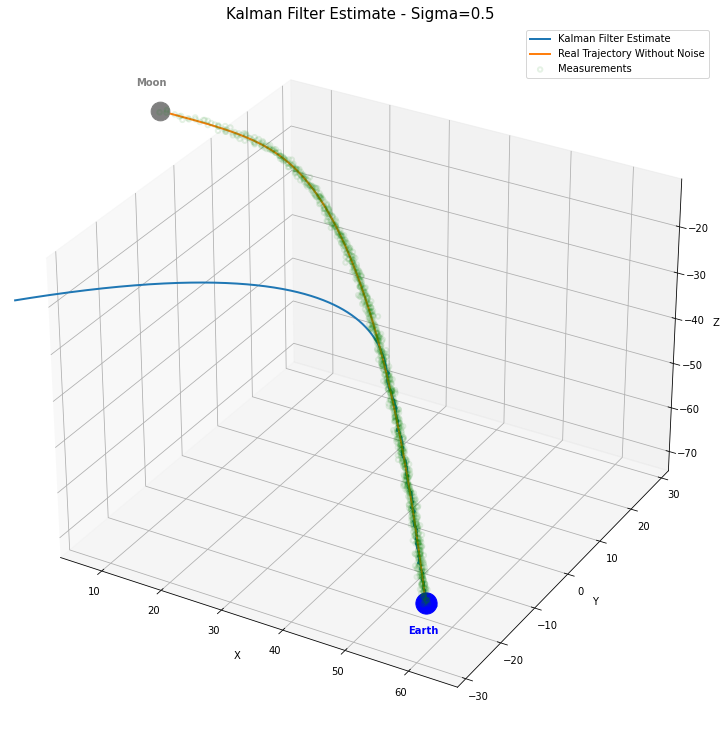

In [7]:
fig = plt.figure(figsize=(16,13))
ax = fig.add_subplot(111, projection='3d')
plot_prediction(preds_2, traj, ax)
#fig.savefig(os.path.join("Plots","Kalman_Prediction_Sigma_0.5.png"))